In [1]:
import os
import os.path as osp
import sys
sys.path.insert(0, osp.dirname(osp.abspath('.')))

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from matplotlib.animation import FuncAnimation
import matplotlib.transforms as transforms
from matplotlib.patches import Ellipse
from utils.display import get_color

In [3]:
INTERMEDIATE_PRODUCT = '../output/5p_da_pm_pp.msv/intermediate.pkl'

In [4]:
with open(INTERMEDIATE_PRODUCT, 'rb') as f:
    results = pickle.load(f)

<IPython.core.display.Javascript object>


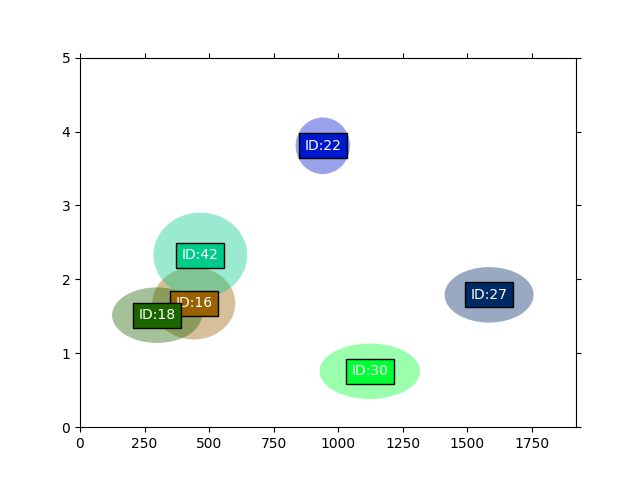

In [5]:
fig, axe = plt.subplots()

def animate(frameId):
    axe.clear()
    axe.set_xlim(0, 1920)
    axe.set_ylim(0, 5)
    
    result = results[frameId+1]
    for track in result:
        tid = track['id']
        xyz = track['xyz']
        std = np.sqrt(track['var'])
        # Prepare metadata
        text = f"ID:{tid}"
        color = (np.array(get_color(tid))/255)
        color = tuple(color.tolist()[::-1])   
        # Prepare Contour
        mean_x = xyz[0]
        mean_z = xyz[2]
        scale_x = std[0, 0]*3
        scale_z = std[2, 2]*3
        ellipse = Ellipse((0, 0),
                          width=2,
                          height=2,
                          facecolor=color,
                          alpha=0.4)
        transform = transforms.Affine2D()\
                        .rotate_deg(45)\
                        .scale(scale_x, scale_z)\
                        .translate(mean_x, mean_z)
        # Plot Contour
        ellipse.set_transform(transform+axe.transData)
        axe.add_patch(ellipse)
        # Plot text
        axe.text(mean_x, mean_z,
                 s=text,
                 ha='center', va='center',
                 color='white', bbox=dict(facecolor=color))

ani = FuncAnimation(fig, animate, frames=len(list(results.keys())), interval=20)
plt.show()